### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

# <font color="white">OCI Machine Learning Lifecycle</font>

## <font color="white">1. Data Access</font>

### <font color="white">1.1 From OCI Object Storage</font>

#### <font color="white">1.1.1 Using API Keys - Stored in a Config File</font>

In [42]:
import ads
import pandas as pd
from ads.common.auth import default_signer
from oci.config import from_file
from os import path
from ads import *

In [9]:
ads.set_auth("api_key",oci_config_location="~/.oci/config")
bucket_name="bucket-20251024-1203"
file_name="WA_Fn-UseC_-HR-Employee-Attrition.csv"
namespace="axk0kzu1y9b9"
df=pd.read_csv(f"oci://{bucket_name}@{namespace}/{file_name}",storage_options=default_signer())

In [10]:
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

#### <font color="white">1.1.2 Using Resource Principal - Access granted through the DataScience Provisioning Template</font>

In [15]:
ads.set_auth("resource_principal")
bucket_name="bucket-20251024-1203"
file_name="WA_Fn-UseC_-HR-Employee-Attrition.csv"
namespace="axk0kzu1y9b9"
df2=pd.read_csv(f"oci://{bucket_name}@{namespace}/{file_name}",storage_options=default_signer())

In [16]:
df2

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

### <font color="white">1.2 From Local Storage</font>

In [18]:
df3=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [19]:
df3

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

### <font color="white">1.3 From Autonomous Database</font>

In [29]:
connection_parameters={
    "user_name": "admin",
    "password": "Password001!",
    "service_name":"employeeattrition_high",
    "wallet_location":"/home/datascience/.oci/Wallet_employeeattrition.zip"
}

df4=pd.DataFrame.ads.read_sql("SELECT * FROM hremployeeattrition",connection_parameters=connection_parameters)


In [30]:
df4

AGE ATTRITION     BUSINESSTRAVEL  DAILYRATE              DEPARTMENT  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DISTANCEFROMHOME  EDUCATION EDUCATIONFIELD  EMPLOYEECOUNT  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EMPLOYEENUMBER  ...  RELATIONSHIPSATISFACTION STANDARDHOURS  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      STOCKOPTIONLEVEL  TOTALWORKINGYEARS  TRAININGTIMESLASTYEAR  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WORKLIFEBALANCE  YEARSATCOMPANY YEARSINCURRENTROLE  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

### <font color="white">1.4 From MySQL Database</font>

In [40]:
connection_parameters={
    "user_name": "admin",
    "password": "Password001!",
    "host": "mydb",
    "port": 3306,
    "database": "mysql20251024170750"
}

df4=pd.DataFrame.ads.read_sql("SELECT * FROM mysql",connection_parameters=connection_parameters,engine="mysql")


ERROR - Exception
Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_21501/1779762448.py", line 9, in <module>
    df4=pd.DataFrame.ads.read_sql("SELECT * FROM mysql",connection_parameters=connection_parameters,engine="mysql")
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/ads/dbmixin/db_pandas_accessor.py", line 92, in read_sql
    Connection = ConnectionFactory.get(engine)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/ads/dbmixin/db_pandas_accessor.py", line 42, in get
    raise Exception(
Exception: Engine mysql does not have either required dependency or is not supported.


Requires mysql-connector-python package to use mysql engine


Exception: Engine mysql does not have either required dependency or is not supported.

### <font color="white">1.5 Amazon S3 Bucket</font>

### <font color="white">1.6 HTTP Endpoints</font>

### <font color="white">1.7 Using DatasetFactory</font>

### <font color="white">1.8 From PyArrow</font>

## <font color="white">2. Data Preparation and Exploration</font>

In [116]:
from ads.dataset.factory import DatasetFactory
from ads.common.auth import default_signer
import os

import pandas as pdf
import numpy as np
import seaborn as sns
sns.set_style("white")
from ads.dataset.label_encoder import DataFrameLabelEncoder
from ads.dataset.helper import up_sample

!pip install oracle-ads[data]
!pip install oracle-ads[viz]
!pip install imbalanced-learn
!pip install oracle-ads[geo]
!pip install oracle-ads[text]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 59.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 842.9/842.9 kB 45.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 64.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.2/920.2 kB 44.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 77.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 58.7 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 73.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 25.9 MB/s  0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.3
    Uninstalling numpy-2.3.3:━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  6/23 [numpy]
      Successfully uninstalled numpy-2.3.3━━━━━━━━━━━━━━━━━━━━  6/23 [numpy]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23/23 [spacy]m22/23 [spacy]tion]ta]
ERRO

### <font color="white">2.1 Data Preprocessing</font>

#### <font color="white">2.1.1 Loading the Attrition Dataset using DatasetFactor</font>

In [64]:
# ads.set_auth(auth='resource_principal')
# bucket_name="hosted-ds-datasets"
# namespace="bigdatadatasciencelarge"
# employees=DatasetFactory.open(
# "oci://{}@{}/synthetic/orcl_attrition.csv".format(bucket_name,namespace),
# target="Attrition",storage_options={'config':{},'region':'us-ashburn-1'})
employees=DatasetFactory.open("WA_Fn-UseC_-HR-Employee-Attrition.csv",target="Attrition")

loop1:   0%|          | 0/4 [00:00<?, ?it/s]

In [62]:
employees

1,470 rows, 35 columns

#### <font color="white">2.1.2 Get and Apply Transform Recommendations </font>

In [91]:
# Get the recommendations
employees.suggest_recommendations()

Code
Message                                                Variables          Suggested                 Action                                                                    
Constant Column                                        EmployeeCount      Drop                      Drop                                      .drop_columns(["EmployeeCount"])
                                                       Over18             Drop                      Drop                                             .drop_columns(["Over18"])
                                                       StandardHours      Drop                      Drop                                      .drop_columns(["StandardHours"])
Contains mostly unique values(100.00%)                 EmployeeNumber     Drop                      Drop                                     .drop_columns(["EmployeeNumber"])
                                                                                                    Do nothing                                                                
Strongly correlated with TotalWorkingYears(78.22%.)    JobLevel           Drop JobLevel             Drop JobLevel                                  .drop_columns(["JobLevel"])
                                                                                                    Drop TotalWorkingYears                .drop_columns(["TotalWorkingYears"])
                                                                                                    Do nothing                                                                
Strongly correlated with TotalWorkingYears(77.29%.)    MonthlyIncome      Drop MonthlyIncome        Drop MonthlyIncome                        .drop_columns(["MonthlyIncome"])
                                                                                                    Drop TotalWorkingYears                .drop_columns(["TotalWorkingYears"])
                                                                                                    Do nothing                                                                
Strongly correlated with YearsWithCurrManager(76.92%.) YearsAtCompany     Drop YearsAtCompany       Drop YearsAtCompany                      .drop_columns(["YearsAtCompany"])
                                                                                                    Drop YearsWithCurrManager          .drop_columns(["YearsWithCurrManager"])
                                                                                                    Do nothing                                                                
Strongly correlated with YearsWithCurrManager(71.44%.) YearsInCurrentRole Drop YearsWithCurrManager Drop YearsInCurrentRole              .drop_columns(["YearsInCurrentRole"])
                                                                                                    Drop YearsWithCurrManager          .drop_columns(["YearsWithCurrManager"])
                                                                                                    Do nothing                                                                
Set Positive Class                                     Attrition          Yes                       No                          .set_positive_class("No", missing_value=False)
                                                                                                    Yes                        .set_positive_class("Yes", missing_value=False)
                                                                                                    Do nothing                                                                
Imbalanced Target(19.22%)                              Attrition          Up-sample                 Do nothing                                                                
                                                                                                    Down-sample                                  

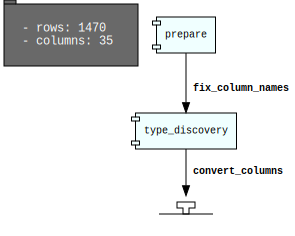

In [73]:
# Visualize the suggested transformations
employees.visualize_transforms()

In [74]:
# Apply the suggested transformation
transformed_emp=employees.auto_transform()

loop1:   0%|          | 0/7 [00:00<?, ?it/s]

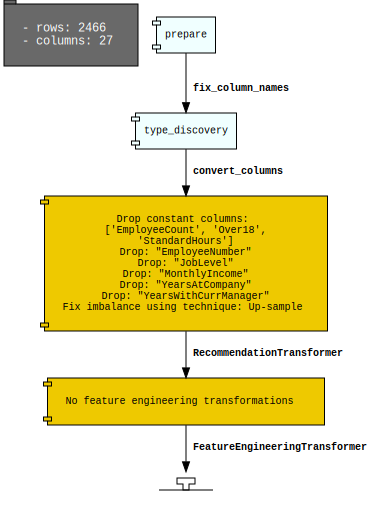

In [75]:
#visualize the applied transformations
transformed_emp.visualize_transforms()

#### <font color="white">2.1.3 Categorical Data Encoding </font>

In [86]:
transformed_emp["JobRole"].value_counts()

JobRole
Sales Executive              570
Laboratory Technician        507
Research Scientist           481
Sales Representative         232
Manufacturing Director       186
Healthcare Representative    156
Manager                      125
Human Resources              121
Research Director             88
Name: count, dtype: int64

In [87]:
# Performing data encoding
ds_encoded=DataFrameLabelEncoder().fit_transform(transformed_emp.to_pandas())
ds_encoded['JobRole'].value_counts()

JobRole
7    570
2    507
6    481
8    232
4    186
0    156
3    125
1    121
5     88
Name: count, dtype: int64

In [90]:
# Performing data upsampling
df_upsampled=up_sample(transformed_emp,['Attrition'],sampler='default',feature_types=None)
df_upsampled.head()

Age     BusinessTravel  DailyRate              Department  \
0   41      Travel_Rarely       1102                   Sales   
1   49  Travel_Frequently        279  Research & Development   
2   37      Travel_Rarely       1373  Research & Development   
3   33  Travel_Frequently       1392  Research & Development   
4   27      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  HourlyRate  ...  PercentSalaryHike PerformanceRating  \
0  Female          94  ...                 11                 3   
1    Male          61  ...                 23                 4   
2    Male          92  ...                 15                 3   
3  Female          56  ...                 11                 3   
4    Male          40  ...                 12                 3   

   RelationshipSatisfaction StockOptionLevel  TotalWorkingYears  \
0                         1                0                  8   
1                         4                1                 10   
2                         2                0                  7   
3                         3                0                  8   
4                         4                1                  6   

   TrainingTimesLastYear WorkLifeBalance  YearsInCurrentRole  \
0                      0               1                   4   
1                      3               3                   7   
2                      3               3                   0   
3                      3               3                   7   
4                      3               3                   2   

   YearsSinceLastPromotion       
0                        0  Yes  
1                        1   No  
2                        0  Yes  
3                        3   No  
4                        2   No  

[5 rows x 27 columns]

#### <font color="white">2.1.4 Splitting the data into Training, Testing, Validation </font>

In [92]:
data_split=transformed_emp.train_validation_test_split(test_size=0.10,
validation_size=0.10)

train,validation,test=data_split

### <font color="white">2.2 Data Visualization</font>

#### <font color="white">2.2.1 Using the Corr() Functin </font>

In [97]:
transformed_emp.corr()

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.040000         -0.019141   0.187448   
DailyRate                 0.040000   1.000000         -0.032148  -0.023887   
DistanceFromHome         -0.019141  -0.032148          1.000000   0.025860   
Education                 0.187448  -0.023887          0.025860   1.000000   
EnvironmentSatisfaction   0.005698  -0.010355          0.002878  -0.008786   
HourlyRate                0.067802   0.088284          0.012118   0.005046   
JobInvolvement            0.059656   0.058225          0.023755   0.083419   
JobSatisfaction           0.031851   0.028394         -0.036476  -0.042860   
MonthlyRate               0.007305  -0.098518          0.021695  -0.029540   
NumCompaniesWorked        0.322559   0.063739         -0.080269   0.082607   
PercentSalaryHike        -0.023727  -0.028449          0.080360  -0.009089   
RelationshipSatisfaction  0.104670  -0.026971          0.022968   0.019440   
StockOptionLevel          0.081513   0.014363          0.025111   0.058614   
TotalWorkingYears         0.687031   0.037020         -0.023056   0.163210   
TrainingTimesLastYear    -0.031202  -0.010870         -0.034229  -0.031720   
WorkLifeBalance          -0.032433  -0.011979         -0.072455  -0.013046   
YearsInCurrentRole        0.300710   0.008872         -0.028621   0.088841   
YearsSinceLastPromotion   0.261744  -0.044073         -0.017867   0.098027   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.005698    0.067802        0.059656   
DailyRate                               -0.010355    0.088284        0.058225   
DistanceFromHome                         0.002878    0.012118        0.023755   
Education                               -0.008786    0.005046        0.083419   
EnvironmentSatisfaction                  1.000000   -0.062235        0.043925   
HourlyRate                              -0.062235    1.000000        0.045847   
JobInvolvement                           0.043925    0.045847        1.000000   
JobSatisfaction                          0.032669   -0.103551       -0.013282   
MonthlyRate                              0.036176   -0.022990       -0.001687   
NumCompaniesWorked                      -0.082391    0.015532       -0.005371   
PercentSalaryHike                        0.014986   -0.038330       -0.011666   
RelationshipSatisfaction                 0.010314    0.019313        0.036184   
StockOptionLevel                        -0.009475   -0.037768        0.055204   
TotalWorkingYears                       -0.018212    0.026570        0.017838   
TrainingTimesLastYear                    0.013716    0.015174       -0.028296   
WorkLifeBalance                         -0.026467   -0.025665        0.015677   
YearsInCurrentRole                       0.024914   -0.034158       -0.004095   
YearsSinceLastPromotion                  0.066327   -0.065279       -0.022523   

                          JobSatisfaction  MonthlyRate  NumCompaniesWorked  \
Age                              0.031851     0.007305            0.322559   
DailyRate                        0.028394    -0.098518            0.063739   
DistanceFromHome                -0.036476     0.021695           -0.080269   
Education                       -0.042860    -0.029540            0.082607   
EnvironmentSatisfaction          0.032669     0.036176           -0.082391   
HourlyRate                      -0.103551    -0.022990            0.015532   
JobInvolvement                  -0.013282    -0.001687           -0.005371   
JobSatisfaction                  1.000000     0.034851           -0.037543   
MonthlyRate                      0.034851     1.000000            0.018342   
NumCompaniesWorked              -0.037543     0.018342            1.000000   
PercentSalaryHike               -0.039090     0.002306           -0.044519   
RelationshipSatisfaction         0.042565     0.030129            0.0775

#### <font color="white">2.2.2 Using the show_in_notebook() function </font>

In [100]:
transformed_emp.show_in_notebook()

Accordion(children=(HTML(value='<h3>Type: BinaryClassificationDataset</h3><h3>2,466 Rows, 27 Columns</h3><h4>C…

#### <font color="white">2.2.3 Using the plot() function </font>

In [119]:
#transformed_emp.plot('Attrition').show_in_notebook(figsize=(4,4))

#### <font color="white">2.2.4 Using the ads.feature_plot() function </font>

<Axes: >

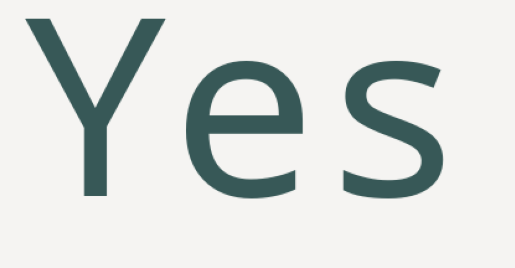

In [117]:
# Univariate Plot
transformed_emp['Attrition'].ads.feature_plot()

Column                         Plot
0                        Age  Axes(0.125,0.11;0.775x0.77)
1             BusinessTravel                         None
2                  DailyRate  Axes(0.125,0.11;0.775x0.77)
3                 Department                         None
4           DistanceFromHome  Axes(0.125,0.11;0.775x0.77)
5                  Education  Axes(0.125,0.11;0.775x0.77)
6             EducationField                         None
7    EnvironmentSatisfaction  Axes(0.125,0.11;0.775x0.77)
8                     Gender                         None
9                 HourlyRate  Axes(0.125,0.11;0.775x0.77)
10            JobInvolvement  Axes(0.125,0.11;0.775x0.77)
11                   JobRole                         None
12           JobSatisfaction  Axes(0.125,0.11;0.775x0.77)
13             MaritalStatus                         None
14               MonthlyRate  Axes(0.125,0.11;0.775x0.77)
15        NumCompaniesWorked  Axes(0.125,0.11;0.775x0.77)
16                  OverTime                         None
17         PercentSalaryHike  Axes(0.125,0.11;0.775x0.77)
18         PerformanceRating  Axes(0.125,0.11;0.775x0.77)
19  RelationshipSatisfaction  Axes(0.125,0.11;0.775x0.77)
20          StockOptionLevel  Axes(0.125,0.11;0.775x0.77)
21         TotalWorkingYears  Axes(0.125,0.11;0.775x0.77)
22     TrainingTimesLastYear  Axes(0.125,0.11;0.775x0.77)
23           WorkLifeBalance  Axes(0.125,0.11;0.775x0.77)
24        YearsInCurrentRole  Axes(0.125,0.11;0.775x0.77)
25   YearsSinceLastPromotion  Axes(0.125,0.11;0.775x0.77)
26                 Attrition                         None

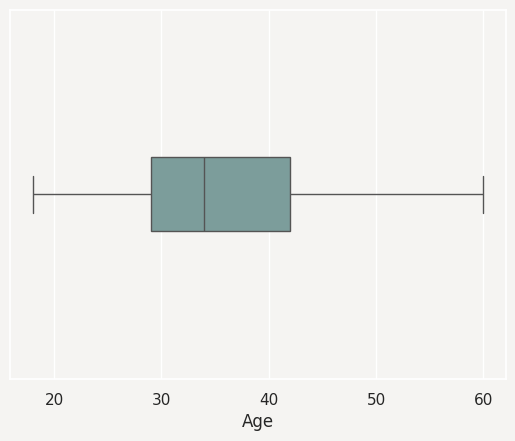

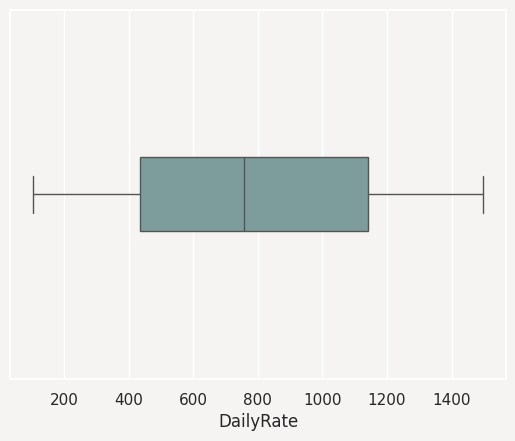

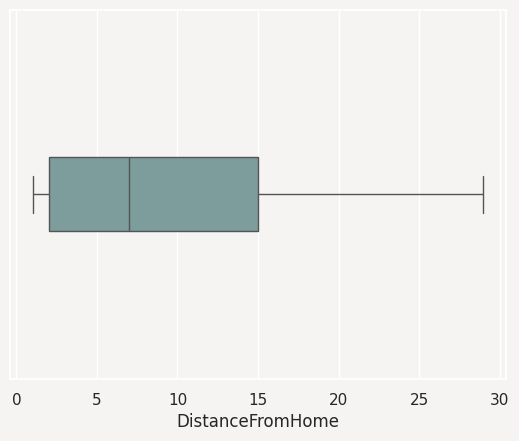

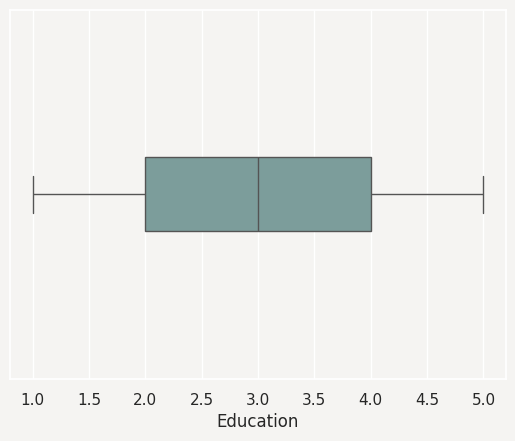

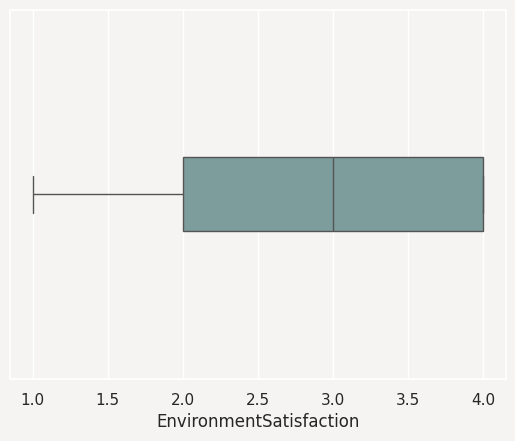

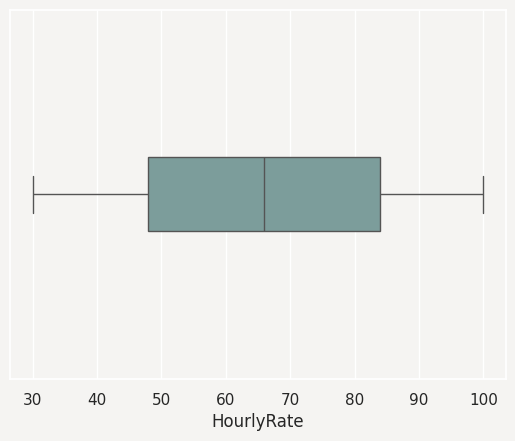

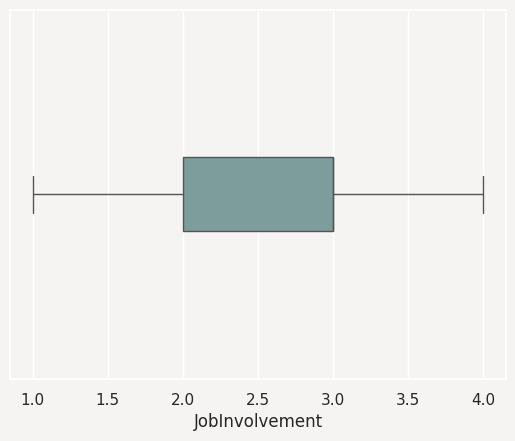

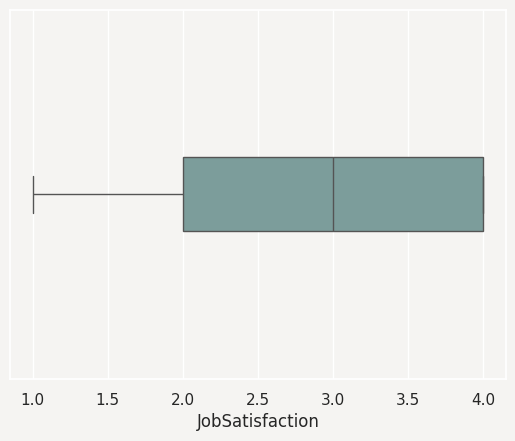

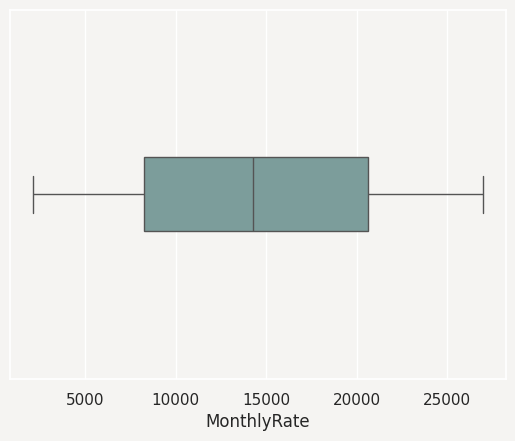

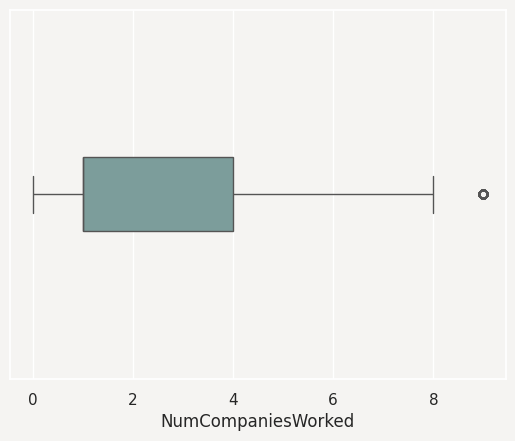

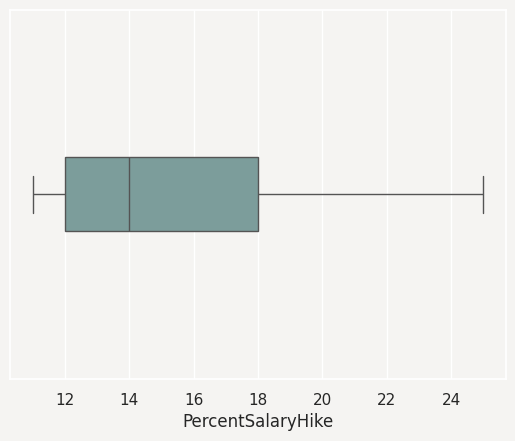

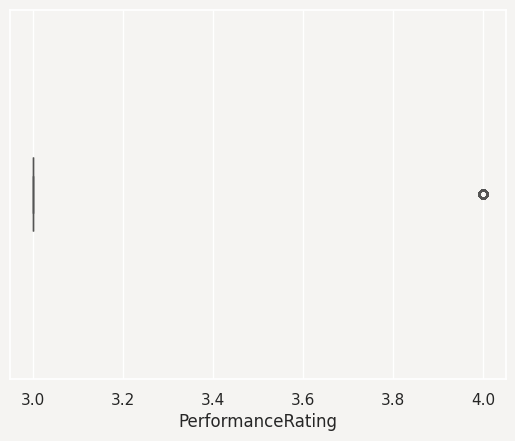

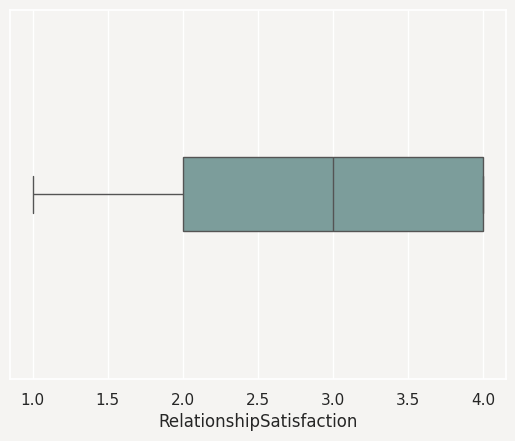

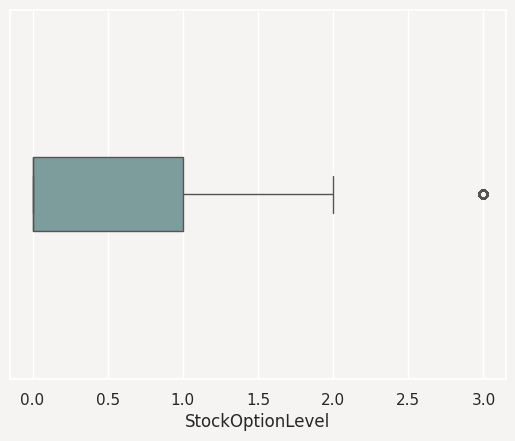

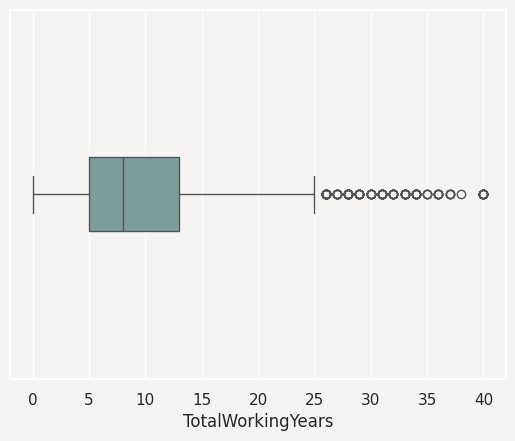

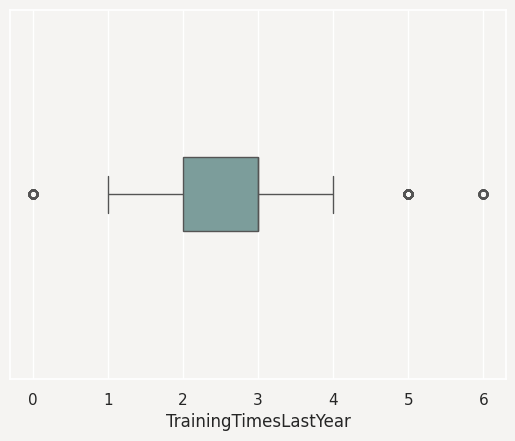

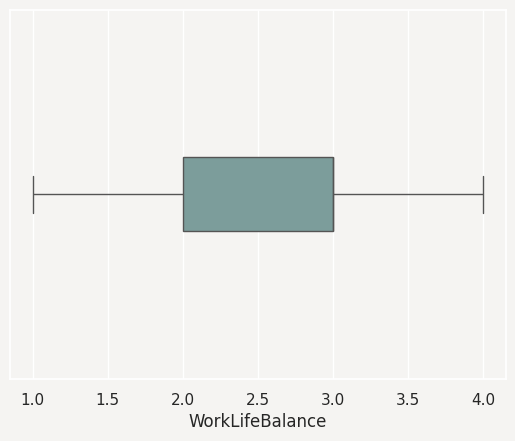

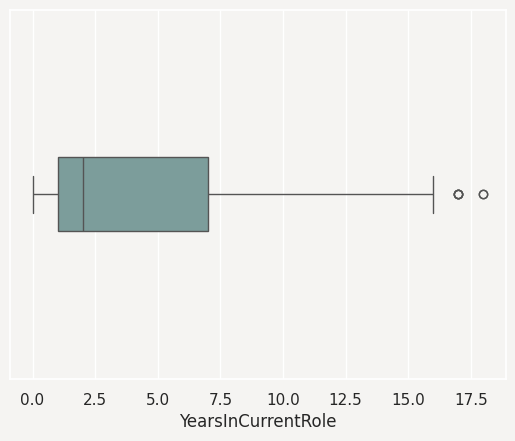

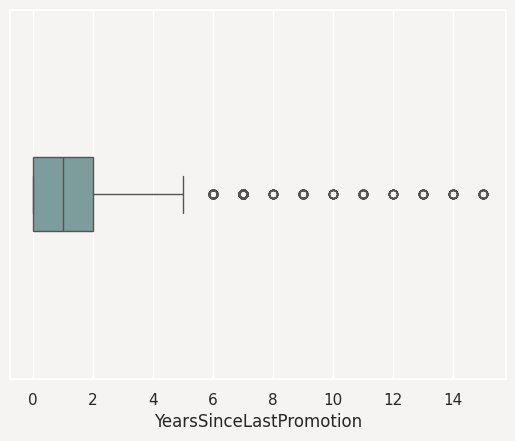

In [114]:
# Multivariate Plot
transformed_emp.ads.feature_plot()

#### <font color="white">2.2.5 Using the call() function for use with Other Visualization Tools </font>

##### <font color="white">2.2.5.1 Using Call() with Seaborn</font>

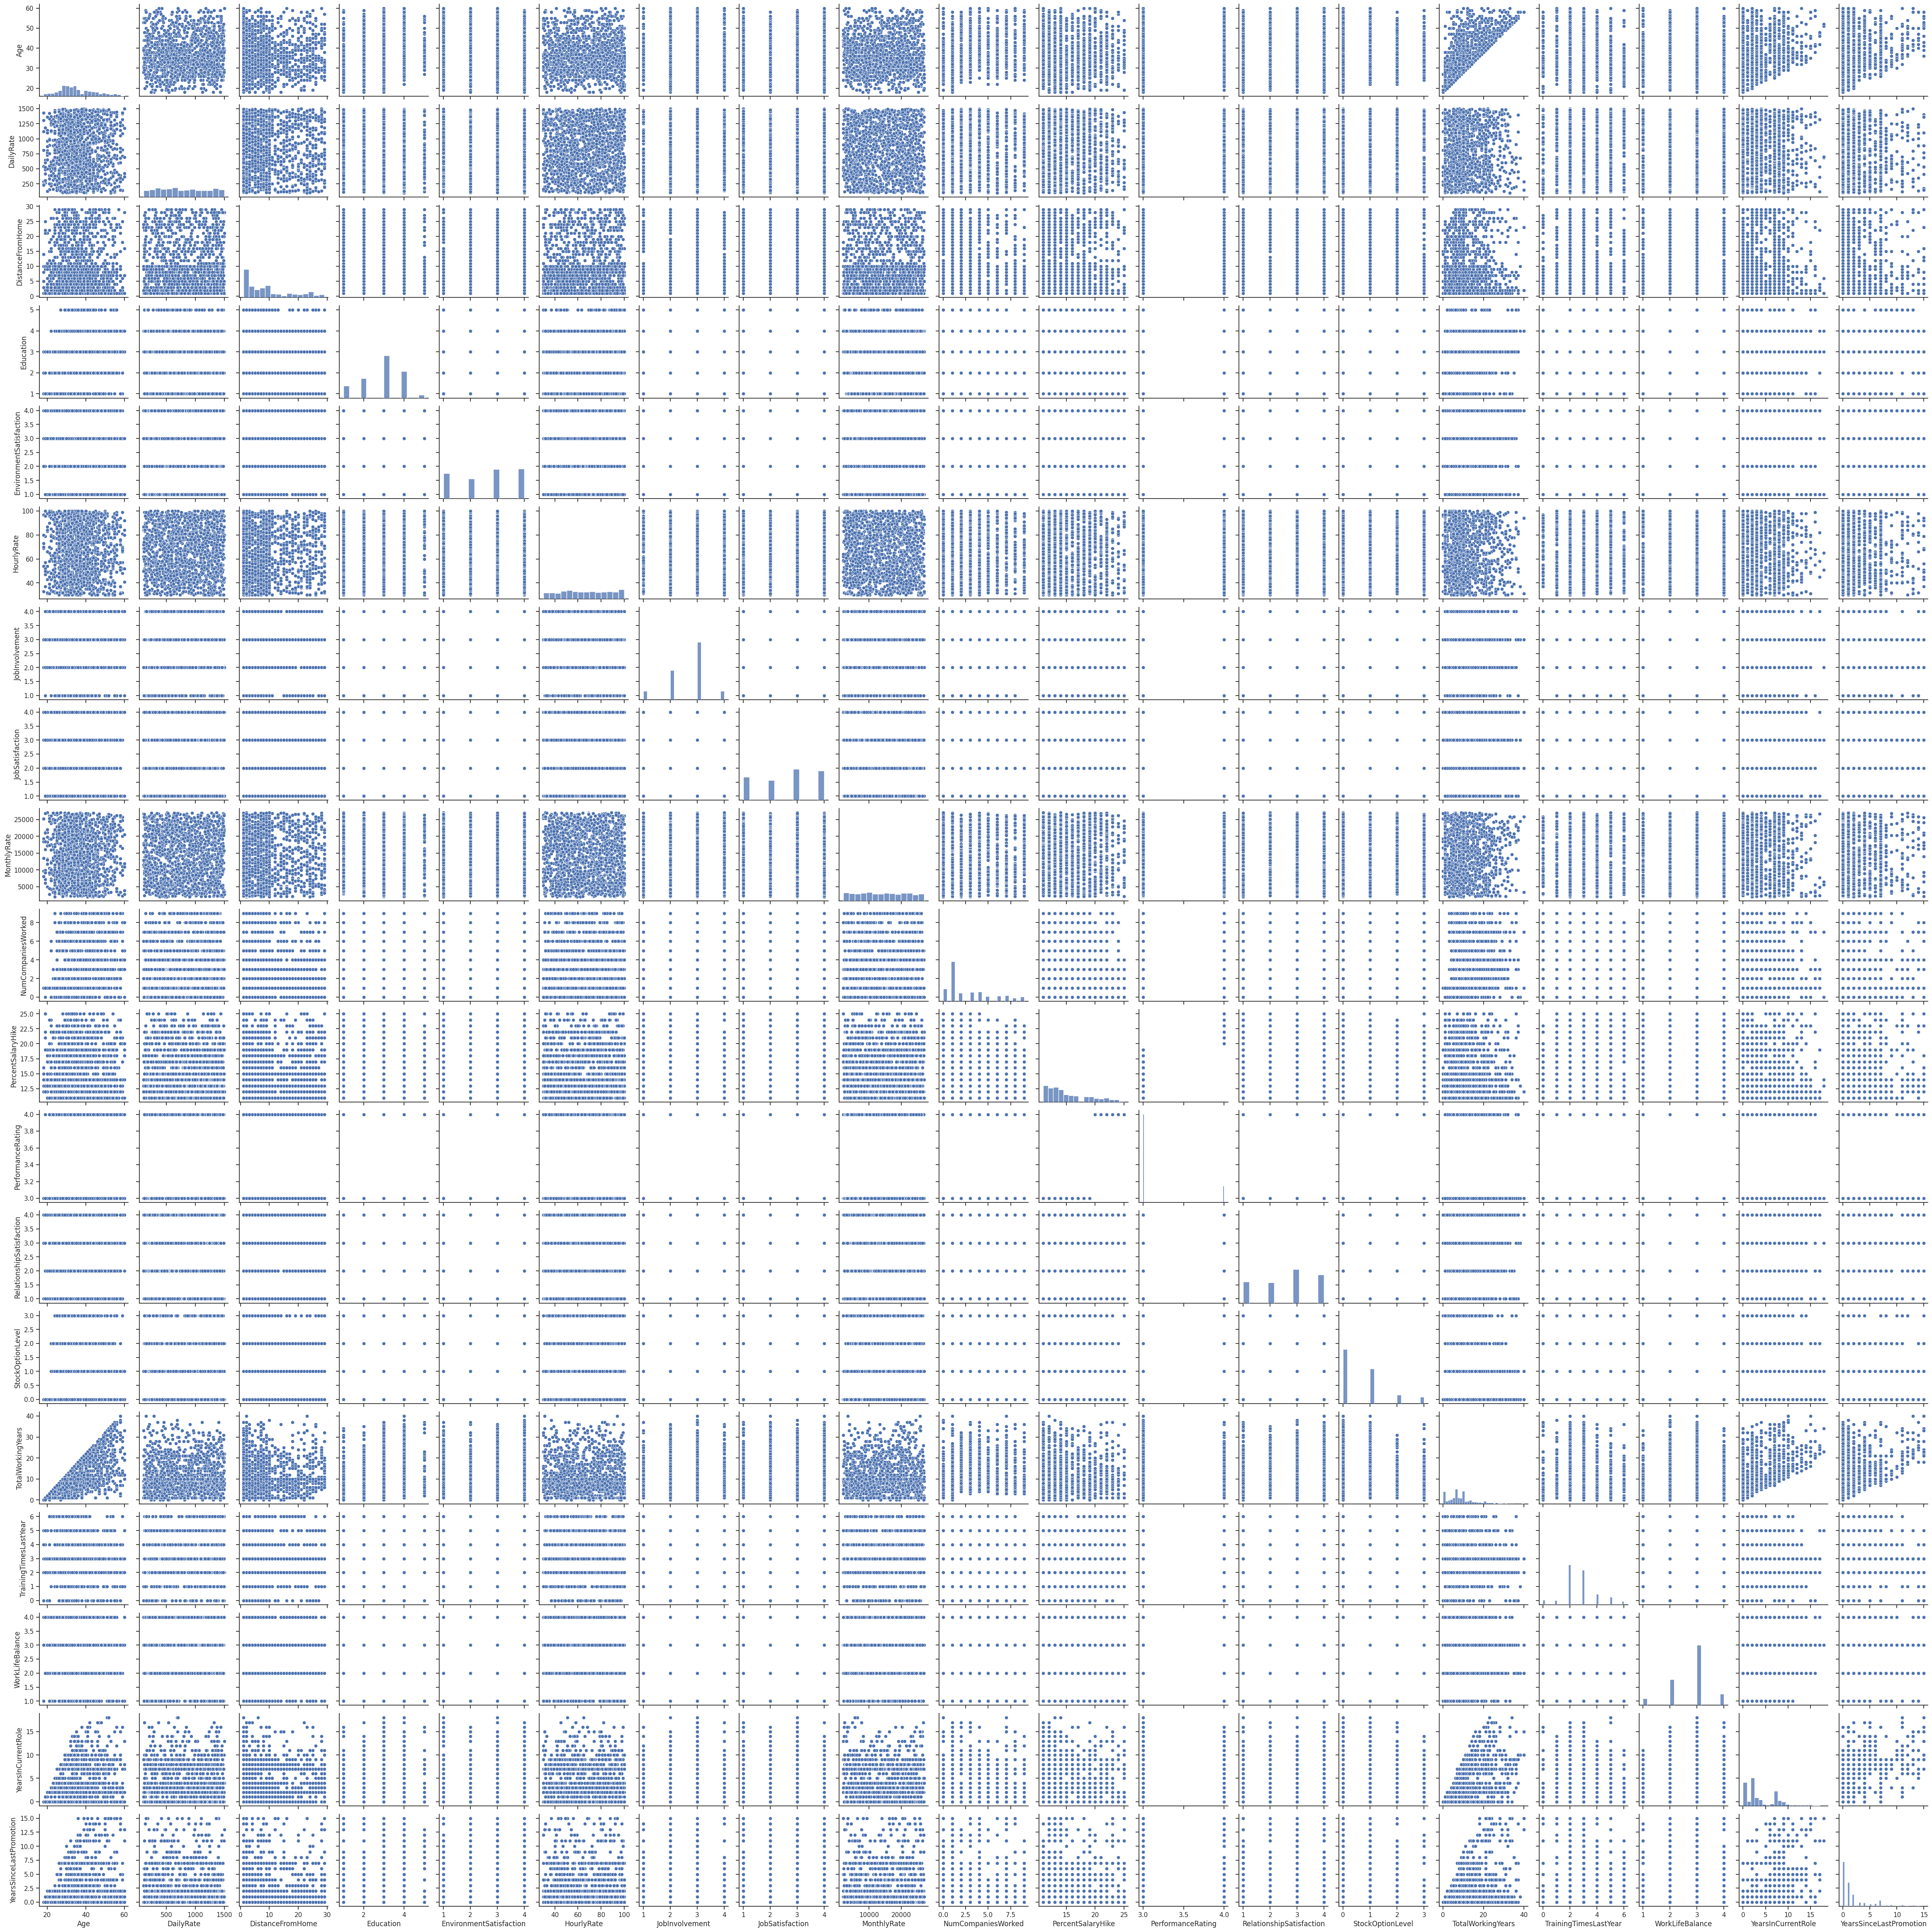

In [126]:
sns.set(style="ticks",color_codes=True)
transformed_emp.call(lambda df: sns.pairplot(df.dropna()))

##### <font color="white">2.2.5.2 Using Call() with Matplotlib</font>

## <font color="white">3. Modelling</font>

### <font color="white">3.1 Model Training - AutoML</font>